In [119]:
import pandas as pd

In [120]:
df = pd.read_csv('covid-19_2568.csv')
df.head()

,No.,date_report,sex,age,nation_type,occupation,pro_id,patient_type,patient_condition
0,816990,1/1/2024,ชาย,23,พม่า,รับจ้าง,กรุงเทพมหานคร,OPD,ยังรักษาตัวอยู่
1,816991,2/1/2024,ชาย,30,ไทย,รับจ้าง,กรุงเทพมหานคร,OPD,ยังรักษาตัวอยู่
2,816992,2/1/2024,ชาย,21,NaN,NaN,กรุงเทพมหานคร,OPD,ยังรักษาตัวอยู่
3,816993,2/1/2024,ชาย,21,NaN,NaN,กรุงเทพมหานคร,OPD,ยังรักษาตัวอยู่
4,816994,2/1/2024,หญิง,55,ไทย,ลูกจ้างประจำ,กรุงเทพมหานคร,OPD,ยังรักษาตัวอยู่


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6186 entries, 0 to 6185
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   No.                6186 non-null   int64 
 1   date_report        6186 non-null   object
 2   sex                6186 non-null   object
 3   age                6186 non-null   int64 
 4   nation_type        5912 non-null   object
 5   occupation         4683 non-null   object
 6   pro_id             6186 non-null   object
 7   patient_type       6186 non-null   object
 8   patient_condition  6186 non-null   object
dtypes: int64(2), object(7)
memory usage: 435.1+ KB


In [122]:
df.describe()

,No.,age
count,6186.000000,6186.000000
mean,820082.500000,38.354672
std,1785.888714,21.424870
min,816990.000000,-1.000000
25%,818536.250000,25.000000
50%,820082.500000,36.000000
75%,821628.750000,53.000000
max,823175.000000,96.000000


<Axes: >

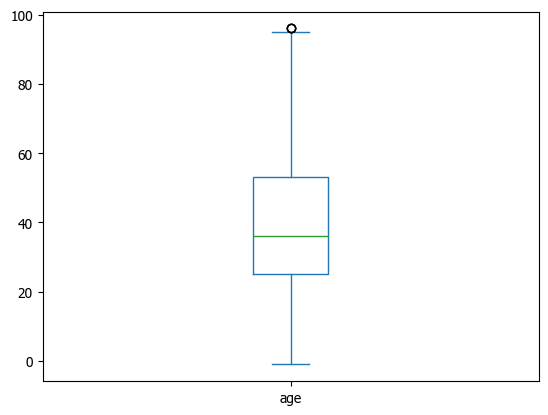

In [123]:
df['age'].plot.box()

In [124]:
df.isnull().sum()

No.                     0
date_report             0
sex                     0
age                     0
nation_type           274
occupation           1503
pro_id                  0
patient_type            0
patient_condition       0
dtype: int64

In [125]:
df[df.isnull().any(axis=1)]
df.head()

,No.,date_report,sex,age,nation_type,occupation,pro_id,patient_type,patient_condition
0,816990,1/1/2024,ชาย,23,พม่า,รับจ้าง,กรุงเทพมหานคร,OPD,ยังรักษาตัวอยู่
1,816991,2/1/2024,ชาย,30,ไทย,รับจ้าง,กรุงเทพมหานคร,OPD,ยังรักษาตัวอยู่
2,816992,2/1/2024,ชาย,21,NaN,NaN,กรุงเทพมหานคร,OPD,ยังรักษาตัวอยู่
3,816993,2/1/2024,ชาย,21,NaN,NaN,กรุงเทพมหานคร,OPD,ยังรักษาตัวอยู่
4,816994,2/1/2024,หญิง,55,ไทย,ลูกจ้างประจำ,กรุงเทพมหานคร,OPD,ยังรักษาตัวอยู่


In [126]:
df = df.dropna()

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4662 entries, 0 to 6184
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   No.                4662 non-null   int64 
 1   date_report        4662 non-null   object
 2   sex                4662 non-null   object
 3   age                4662 non-null   int64 
 4   nation_type        4662 non-null   object
 5   occupation         4662 non-null   object
 6   pro_id             4662 non-null   object
 7   patient_type       4662 non-null   object
 8   patient_condition  4662 non-null   object
dtypes: int64(2), object(7)
memory usage: 364.2+ KB


In [128]:
pd.set_option('display.max_rows', None)
df['occupation'].value_counts()

occupation
คนงานรับจ้างทั่วไป                                                        985
ไม่ทราบ / ไม่ระบุ                                                         799
รับจ้าง                                                                   571
นักเรียน/นักศึกษา                                                         294
ไม่มีงานทำ                                                                251
พนักงานหน่วยงานเอกชน                                                      248
ในปกครอง                                                                  237
งานบ้าน                                                                   114
แม่บ้าน/พ่อบ้าน                                                            86
พยาบาล                                                                     81
อื่นๆ                                                                      73
ข้าราชการการเมืองและนักการเมือง                                            69
ไม่ระบุ                                              

In [129]:
df_grouped = df.groupby('occupation').count().reset_index()
df_grouped.insert(0, 'No', range(1, len(df_grouped) + 1))
df_grouped

,No,occupation,No.,date_report,sex,age,nation_type,pro_id,patient_type,patient_condition
0,1,กรรมกร,1,1,1,1,1,1,1,1
1,2,ข้าราชการการเมือง,1,1,1,1,1,1,1,1
2,3,ข้าราชการการเมืองและนักการเมือง,69,69,69,69,69,69,69,69
3,4,ข้าราชการบำนาญ,55,55,55,55,55,55,55,55
4,5,ข้าราชการระดับอาวุโส ตำรวจ,42,42,42,42,42,42,42,42
5,6,คนกวาดขยะ,8,8,8,8,8,8,8,8
6,7,คนขับรถรับจ้าง,1,1,1,1,1,1,1,1
7,8,คนงานประมงและเพาะเลี้ยงสัตว์น้ำ,2,2,2,2,2,2,2,2
8,9,คนงานรับจ้างทั่วไป,985,985,985,985,985,985,985,985
9,10,คนงานเก็บผลไม้,5,5,5,5,5,5,5,5


In [130]:
df.insert(2, 'occupations', df['occupation'].replace({
    'ทหาร,ตำรวจ':'ทหาร',
    'ครูสอนระดับปฐมวัย' : 'ครู',
    'ครูสอนระดับประถมศึกษา'	: 'ครู',
    'ครูสอนระดับมหาวิทยาลัยและระดับอุดมศึกษา' : 'ครู',
    'ครูสอนระดับมัธยมศึกษา'	: 'ครู',
    'งานบ้าน' : 'คนทำงานบ้านทั่วไป',
    'คนงานประมงและเพาะเลี้ยงสัตว์น้ำ'	: 'ประมง',
    'ชาวประมงพื้นบ้าน' : 'ประมง' ,
    'ทหารชั้นประทวน' 	:'ทหาร',
    'ทหารชั้นสัญญาบัตร	':'ทหาร',
    'ทหารยศอื่นๆ	' :'ทหาร',
    'นักเรียน/นักศึกษา' : 'นักศึกษา',
    'ผู้บัญชาการตำรวจแห่งชาติ' : 'ตำรวจ',
    'ลูกจ้างประจำ	' : 'คนงานรับจ้างทั่วไป',
    'ลูกจ้างชั่วคราว' : 'รับจ้าง',	
    'ไม่มีอาชีพ' : 'ไม่มีงานทำ',
    'ไม่ทราบ / ไม่ระบุ' : 'ไม่ระบุ',
    'ในความปกครอง' : 'ในปกครอง',
    'แม่บ้าน/พ่อบ้าน' : 'แม่บ้าน',
    'แพทย์ทั่วไป' : 'แพทย์',
    'วิศวกรอุตสาหการและการผลิต	' : 'วิศวกร',
    'ผู้จัดการด้านการขาย การตลาด' : 'อื่นๆ',
    'ผู้จัดการด้านการผลิตภาครัฐวิสาหกิจและเอกชน	' : 'พนักงานหน่วยงานเอกชน',
    'ผู้จัดการด้านบริการและบริหารจัดการ' : 'ค้าขาย',
    'ผู้จำหน่วยสินค้าตามบ้าน' : 'ค้าขาย', 
    'ผู้จำหน่ายสินค้าตามแผงลอยและตลาด' : 'ค้าขาย',
    'ผู้จำหน่ายสินค้าในศูนย์บริการทางโทรศัพท์' : 'ค้าขาย',
    'ผู้ปฏิบัติงานด้านช่างอื่น ๆ' : 'อื่นๆ',
    'ผู้ประกอบวิชาชีพงานพื้นฐานอื่น' : 'อื่นๆ',	
    'ผู้ประกอบวิชาชีพด้านศาสนา'	: 'อื่นๆ',
    'ผู้ประกอบวิชาชีพที่เกี่ยวกับด้านกฎระเบียนของรัฐ' : 'อื่นๆ',
    'ผู้ประกอบวิชาชีพที่เกี่ยวข้องกับการพยาบาล ' : 'อื่นๆ' ,  
    'ผู้ปลูกพืชแบบผสมผสาน' :'เกษตรกรรม',
    'ผู้ปลูกยางพารา' :'เกษตรกรรม',
    'ข้าราชการการเมืองและนักการเมือง' : 'ข้าราชการการเมือง',
    'ข้าราชการบำนาญ' : 'ข้าราชการการเมือง',
    'ข้าราชการระดับอาวุโส ตำรวจ' : 'ข้าราชการการเมือง',
    'พนักงานรับโทรศัพท์': 'คนงานรับจ้างทั่วไป',
    'พนักงานขาย': 'คนงานรับจ้างทั่วไป',
    'ผู้เชี่ยวชาญด้านการศึกษา': 'ครู',
    'ที่ปรึกษาด้านการลดน้ำหนักและกระชับสัดส่วน' : 'รับจ้าง',
    'เจ้าของร้านค้า' : 'เจ้าของกิจการ',
    'ทำนา'  :  'เกษตรกรรม',
    'ทำฟาร์มนม' : 'เกษตรกรรม',	
    'ทำสวน' : 'เกษตรกรรม',
    'ผู้สูงอายุ(ไม่มีอาชีพ)' : 'ไม่มีงานทำ',
    'รับราชการ (อาวุโส)' : 'รับราชการ',
    'เจ้าหน้าที่ตำรวจ' : 'ตำรวจ',
    'เจ้าหน้าที่เทคนิคด้านเภสัชกรรมและผู้ช่วย' : 'เภสัชกร',
    'เจ้าหน้าที่ช่วยงานพยาบาลตามคลินิกหรือโรงพยาบาล'  : 'อื่นๆ',
    'เจ้าหน้าที่เทคนิคในธนาคารเลือด' : 'อื่นๆ',
    'พนักงานดูแลงานบ้าน/แม่บ้าน' : 'แม่บ้าน',
    'พนักงานที่ทำงานช่วยเหลือด้านการแพทย์' : 'อื่นๆ',
    'พนักงานประจำลานจอดรถ'	: 'อื่นๆ',
    'พนักงานสาธิตและขายสินค้า' : 'อื่นๆ',
    'ผู้ปลูกไม้ดอกไม้ประดับ': 'อื่นๆ'

}),
          True
         )

In [131]:
print(type(df['occupations']))
print(df['occupations'].ndim)

<class 'pandas.core.series.Series'>
1


In [132]:
df.to_csv("cleaned2_covid_data.csv", index=False, encoding='utf-8-sig')

In [133]:
df['occupations'].apply(type).value_counts()

occupations
<class 'str'>    4662
Name: count, dtype: int64

In [134]:
occupations_df = df.groupby('occupations').count()['No.'].reset_index()
occupations_df

,occupations,No.
0,กรรมกร,1
1,ข้าราชการการเมือง,167
2,คนกวาดขยะ,8
3,คนขับรถรับจ้าง,1
4,คนงานรับจ้างทั่วไป,987
5,คนงานเก็บผลไม้,5
6,คนงานเพาะชำพันธุ์ไม้,4
7,คนงานแบกของในสถานที่ก่อสร้าง,2
8,คนงานและผู้ช่วยทำความสะอาดสำนักงาน โรงแรม,1
9,คนทำงานบ้านทั่วไป,133


In [135]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'

<Axes: xlabel='sex'>

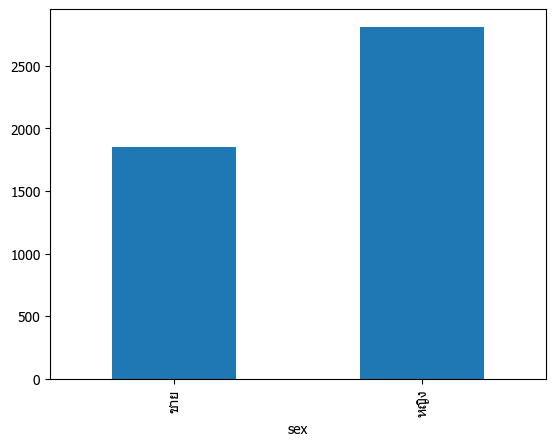

In [136]:
df.groupby('sex').count()['No.'].plot.bar()

<Axes: >

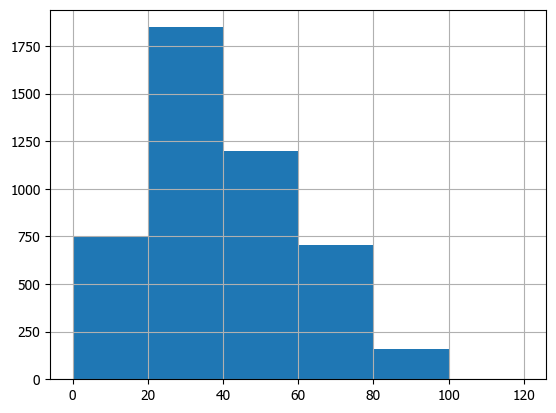

In [137]:
df['age'].hist(bins=[0, 20, 40, 60, 80, 100, 120])

In [138]:
df.groupby('pro_id').count()['No.'].reset_index()

,pro_id,No.
0,\tสุพรรณบุรี,1
1,\tแพร่,1
2,เชียงราย,1
3,กรุงเทพมหานคร,217
4,กำแพงเพชร,2
5,ขอนแก่น,2
6,จันทบุรี,587
7,ฉะเชิงเทรา,279
8,ชลบุรี,1573
9,ตราด,166


In [139]:
df['pro_id'] = df['pro_id'].replace({
        '\tสุพรรณบุรี': 'สุพรรณบุรี',
        '\tแพร่' : 'แพร่'
})

In [140]:
df['date_report'] = pd.to_datetime(df['date_report'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['date_report'])
df.set_index('date_report', inplace=True)

In [89]:
df_monthly = df.groupby(pd.Grouper(freq='ME')).agg({'No.': 'count'}).reset_index()
df_monthly.columns = ['ds', 'y']

In [90]:
print(df_monthly.head(20))
print(df_monthly.info())

           ds     y
0  2024-01-31    89
1  2024-02-29    49
2  2024-03-31     7
3  2024-04-30    10
4  2024-05-31    12
5  2024-06-30     2
6  2024-07-31     1
7  2024-08-31    13
8  2024-09-30     8
9  2024-10-31  1087
10 2024-11-30  1588
11 2024-12-31  1182
12 2025-01-31   572
13 2025-02-28    42
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      14 non-null     datetime64[ns]
 1   y       14 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 356.0 bytes
None


In [91]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [94]:
df_mothly = pd.DataFrame({
       'ds':pd.to_datetime(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
                            '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
                            '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
                            '2025-01-31', '2025-02-28']),
        'y': [89, 89, 7, 10, 12, 2, 1, 13, 8, 1087, 1588, 1182, 572, 43,]})

In [101]:
m = Prophet()
m.fit(df_monthly)

12:43:19 - cmdstanpy - INFO - Chain [1] start processing
12:43:19 - cmdstanpy - INFO - Chain [1] done processing


In [102]:
future = m.make_future_dataframe(periods=12, freq='ME')

In [103]:
forecast = m.predict(future)
print(' --- Forcast Results ---')
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())

 --- Forcast Results ---
          ds        yhat  yhat_lower  yhat_upper
0 2024-01-31 -115.731376 -737.282408  441.484344
1 2024-02-29  -49.513392 -619.746815  481.005104
2 2024-03-31   21.271349 -557.740053  605.274077
3 2024-04-30   89.772712 -458.212975  651.438991
4 2024-05-31  160.557453 -373.660776  723.183048
           ds         yhat   yhat_lower   yhat_upper
21 2025-10-31  1343.347645   782.214146  1961.223567
22 2025-11-30  1411.849007   841.641157  1963.957344
23 2025-12-31  1482.633748   920.630970  2053.182121
24 2026-01-31  1553.418490   978.622781  2111.821087
25 2026-02-28  1617.353095  1060.466076  2185.113269


In [104]:
plt.rcParams['font.family'] = 'tahoma'

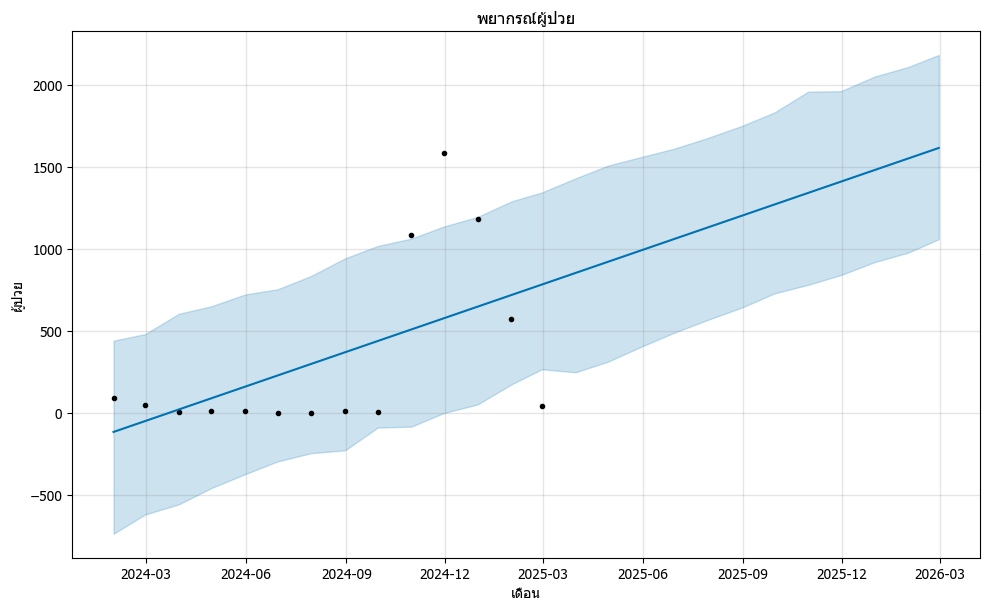

In [105]:
fig1 = m.plot(forecast)
plt.title('พยากรณ์ผู้ป่วย')
plt.xlabel('เดือน')
plt.ylabel('ผู้ป่วย')
plt.show()